In [1]:
import numpy as np 
import string
import os
import cv2 
import matplotlib.pyplot as plt

In [2]:
d = {chr(i): i for i in range(255)}
c = {i: chr(i) for i in range(255)}

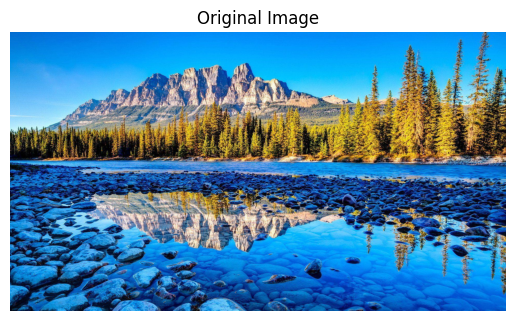

In [3]:
x = cv2.imread('landscape.jpg')
x_rgb = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
plt.imshow(x_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()


In [4]:
x.shape

(1080, 1920, 3)

In [5]:
key="123"
text="@AryanHimanshu - I am Ironman"

In [6]:
key

'123'

In [7]:
text_ascii=[d[ch] for ch in text]
key_ascii=[d[ch] for ch in key]
print(text_ascii)
print(key_ascii)

[64, 65, 114, 121, 97, 110, 72, 105, 109, 97, 110, 115, 104, 117, 32, 45, 32, 73, 32, 97, 109, 32, 73, 114, 111, 110, 109, 97, 110]
[49, 50, 51]


In [8]:
x_enc = x.copy()
n = 0 
m = 0 
z = 0 
l = len(text) 
kl = 0
for i in range(l):
    orig_val=x_enc[m,n,z]
    new_val = d[text[i]] ^ d[key[kl]]
    x_enc[n,m,z] = new_val
    print(f"Embedding '{text[i]}' (ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII {d[key[kl]]}) = {new_val} at pixel ({n},{m},{z}) [original={orig_val}")
    n = n + 1    
    m = m + 1
    m = (m+1)%3    
    kl = (kl + 1) % len(key)

Embedding '@' (ASCII 64) XOR '1' (ASCII 49) = 113 at pixel (0,0,0) [original=212
Embedding 'A' (ASCII 65) XOR '2' (ASCII 50) = 115 at pixel (1,2,0) [original=207
Embedding 'r' (ASCII 114) XOR '3' (ASCII 51) = 65 at pixel (2,1,0) [original=115
Embedding 'y' (ASCII 121) XOR '1' (ASCII 49) = 72 at pixel (3,0,0) [original=210
Embedding 'a' (ASCII 97) XOR '2' (ASCII 50) = 83 at pixel (4,2,0) [original=208
Embedding 'n' (ASCII 110) XOR '3' (ASCII 51) = 93 at pixel (5,1,0) [original=208
Embedding 'H' (ASCII 72) XOR '1' (ASCII 49) = 121 at pixel (6,0,0) [original=209
Embedding 'i' (ASCII 105) XOR '2' (ASCII 50) = 91 at pixel (7,2,0) [original=208
Embedding 'm' (ASCII 109) XOR '3' (ASCII 51) = 94 at pixel (8,1,0) [original=207
Embedding 'a' (ASCII 97) XOR '1' (ASCII 49) = 80 at pixel (9,0,0) [original=208
Embedding 'n' (ASCII 110) XOR '2' (ASCII 50) = 92 at pixel (10,2,0) [original=209
Embedding 's' (ASCII 115) XOR '3' (ASCII 51) = 64 at pixel (11,1,0) [original=209
Embedding 'h' (ASCII 104) XO

In [9]:
cv2.imwrite("encryptedls.jpg", x_enc)

True

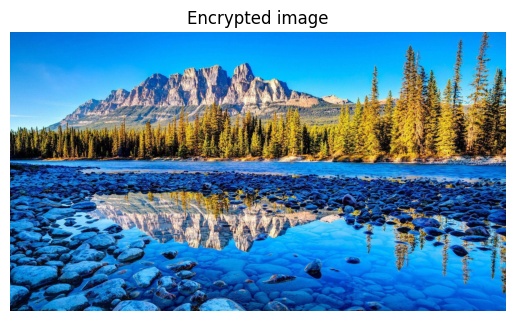

In [10]:
rgb_enc = cv2.cvtColor(x_enc, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_enc)
plt.axis('off')
plt.title('Encrypted image')
plt.show()

In [11]:
n,m,z = 0, 0, 0
kl = 0

decrypt = ''
for i in range(l):
    val=x_enc[n,m,z]
    orig_char = c[val ^ d[key[kl]]]
    decrypt =decrypt+orig_char
    print(f"Decrypting pixel ({n},{m},{z}): {val} XOR {d[key[kl]]} = {val ^ d[key[kl]]} -> '{orig_char}'")
    n=n+1
    m=m+1
    m=(m+1)%3
   
    kl=(kl+1)%len(key)
print(decrypt)

Decrypting pixel (0,0,0): 113 XOR 49 = 64 -> '@'
Decrypting pixel (1,2,0): 115 XOR 50 = 65 -> 'A'
Decrypting pixel (2,1,0): 65 XOR 51 = 114 -> 'r'
Decrypting pixel (3,0,0): 72 XOR 49 = 121 -> 'y'
Decrypting pixel (4,2,0): 83 XOR 50 = 97 -> 'a'
Decrypting pixel (5,1,0): 93 XOR 51 = 110 -> 'n'
Decrypting pixel (6,0,0): 121 XOR 49 = 72 -> 'H'
Decrypting pixel (7,2,0): 91 XOR 50 = 105 -> 'i'
Decrypting pixel (8,1,0): 94 XOR 51 = 109 -> 'm'
Decrypting pixel (9,0,0): 80 XOR 49 = 97 -> 'a'
Decrypting pixel (10,2,0): 92 XOR 50 = 110 -> 'n'
Decrypting pixel (11,1,0): 64 XOR 51 = 115 -> 's'
Decrypting pixel (12,0,0): 89 XOR 49 = 104 -> 'h'
Decrypting pixel (13,2,0): 71 XOR 50 = 117 -> 'u'
Decrypting pixel (14,1,0): 19 XOR 51 = 32 -> ' '
Decrypting pixel (15,0,0): 28 XOR 49 = 45 -> '-'
Decrypting pixel (16,2,0): 18 XOR 50 = 32 -> ' '
Decrypting pixel (17,1,0): 122 XOR 51 = 73 -> 'I'
Decrypting pixel (18,0,0): 17 XOR 49 = 32 -> ' '
Decrypting pixel (19,2,0): 83 XOR 50 = 97 -> 'a'
Decrypting pixel 

In [12]:
print("Decrypted text: ", decrypt)

Decrypted text:  @AryanHimanshu - I am Ironman
